In [42]:
import random
import numpy as np
from typing import Literal
from code.maze import Maze

m = Maze()


def shortest_check_old(incident_matrix: np.ndarray, start_node: int = 0, end_node: int | None = None) -> tuple[bool, list[int]]:
    if end_node is None:
        end_node = incident_matrix.shape[0] - 1
    visited = [False] * incident_matrix.shape[0]
    visited[start_node] = True
    queue = [start_node]
    list_of_paths = [[start_node]]
    non_zero = [i for i, line in enumerate(incident_matrix) if np.any(line)]
    while queue:
        current = queue.pop(0)
        path = list_of_paths.pop(0)
        if current == end_node:
            return True, path
        for i in non_zero:
            if not visited[i] and incident_matrix[current, i]:
                visited[i] = True
                queue.append(i)
                list_of_paths.append(path + [i])
    return False, []


In [4]:
def shortest_check(incident_matrix: np.ndarray, start_node: int = 0, end_node: int | None = None):
    if end_node is None:
        end_node = incident_matrix.shape[0] - 1
    visited = [False] * incident_matrix.shape[0]
    visited[start_node] = True
    queue = [start_node]
    list_of_paths = [[start_node]]
    non_zero = [i for i, line in enumerate(incident_matrix) if np.any(line)]
    while queue:
        current = queue.pop(0)
        path = list_of_paths.pop(0)
        if current == end_node:
            return True, path
        for i in non_zero:
            if not visited[i] and incident_matrix[current, i]:
                visited[i] = True
                queue.append(i)
                list_of_paths.append(path + [i])
    return False, []

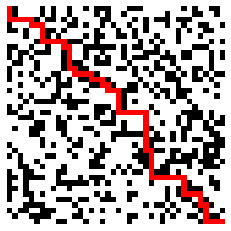

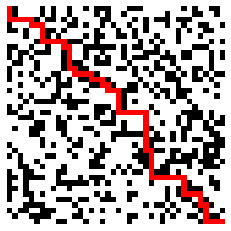

In [215]:
maze = m.generate_temple(40, mode="empty")
height, width = maze.shape
numbers = np.random.choice(range(1, width**2), width**2 - 1, replace=False)

def generate_maze_test(maze: np.ndarray,numbers, iter_num: int = 10) -> np.ndarray:
    incident_matrix = m.incident(maze)
    non_solvable = 0
    height, width = maze.shape
    cor, path = shortest_check(incident_matrix)
    i = 0
    while non_solvable < iter_num and i < width**2 - 1:
        num = numbers[i]
        row = num // width
        column = num % width
        maze[row, column] = 1
        if column != 0 and not maze[row, column-1]:
            incident_matrix[num, num - 1] = 0
            incident_matrix[num - 1, num] = 0
        if column != width - 1 and not maze[row, column+1]:
            incident_matrix[num, num + 1] = 0
            incident_matrix[num + 1, num] = 0
        if row != 0 and not maze[row-1, column]:
            incident_matrix[num, (row - 1) * width + column] = 0
            incident_matrix[(row - 1) * width + column, num] = 0
        if row != height - 1 and not maze[row+1, column]:
            incident_matrix[num, (row + 1) * width + column] = 0
            incident_matrix[(row + 1) * width + column, num] = 0
        if num in path:
            cor, path_new = shortest_check(incident_matrix)
            if not cor:
                non_solvable += 1
                maze[row, column] = 0
                if column != 0 and not maze[row, column-1]:
                    incident_matrix[num, num - 1] = 1
                    incident_matrix[num - 1, num] = 1
                if column != width - 1 and not maze[row, column+1]:
                    incident_matrix[num, num + 1] = 1
                    incident_matrix[num + 1, num] = 1
                if row != 0 and not maze[row-1, column]:
                    incident_matrix[num, (row - 1) * width + column] = 1
                    incident_matrix[(row - 1) * width + column, num] = 1
                if row != height - 1 and not maze[row+1, column]:
                    incident_matrix[num, (row + 1) * width + column] = 1
                    incident_matrix[(row + 1) * width + column, num] = 1
            else:
                path = path_new
        i += 1
    return maze


def generate_maze_test_slower(maze: np.ndarray, numbers, iter_num: int = 10) -> np.ndarray:
    incident_matrix = m.incident(maze)
    non_solvable = 0
    height, width = maze.shape
    cor, path = shortest_check(incident_matrix)
    i = 0
    while non_solvable < iter_num and i < width**2 - 1:
        num = numbers[i]
        row = num // width
        column = num % width
        maze[row, column] = 1
        incident_matrix_copy = incident_matrix[num, :].copy()
        incident_matrix[num, :] = 0
        incident_matrix[:, num] = 0
        if num in path:
            cor, path_new = shortest_check(incident_matrix)
            if not cor:
                non_solvable += 1
                incident_matrix[num, :] = incident_matrix_copy
                incident_matrix[:, num] = incident_matrix_copy
                maze[row, column] = 0
            else:
                path = path_new
        i += 1
    return maze

maze = generate_maze_test(maze, numbers, 2)
incident_matrix = m.incident(maze)
path = m.find_shortest_path(incident_matrix)
maze = m.add_path_to_maze(maze, path)
m.plot_maze(maze)
maze = m.generate_temple(40, mode="empty")
maze = generate_maze_test_slower(maze, numbers, 2)
incident_matrix = m.incident(maze)
path = m.find_shortest_path(incident_matrix)
maze = m.add_path_to_maze(maze, path)
m.plot_maze(maze)

In [223]:
# to do so numbers dont repeat, we can use np.random.choice
# optimize the code with path

maze = m.generate_temple(40, mode="empty")
%timeit generate_maze_test(maze, numbers, 20)

277 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [222]:
# check if its overides the ones in maze
maze = m.generate_temple(40, mode="empty")
%timeit generate_maze_test_slower(maze, numbers, 20)

294 ms ± 8.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
